In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob import Word
import nltk


# Đọc dữ liệu từ file
df= pd.read_csv("/var/train.txt")
print(df.size)
# Kiểm tra dữ liệu
print(df.head())
# Lấy cột 'comment' và 'label'
comments = df['comment']
labels = df['label']
# Xuất dữ liệu đã tách
print("Comments:")
print(comments.head())
print("\nLabels:")
print(labels.head())

14014
                                             comment  label
0  Mới mua máy này Tại thegioididong thốt nốt cảm...      5
1  Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...      5
2  Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...      3
3  Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...      3
4  Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...      5
Comments:
0    Mới mua máy này Tại thegioididong thốt nốt cảm...
1    Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...
2    Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...
3    Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...
4    Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...
Name: comment, dtype: object

Labels:
0    5
1    5
2    3
3    3
4    5
Name: label, dtype: int64


In [ ]:
df['comment'] = df['comment'].str.replace(r'\d+', '', regex=True)
# Hàm tiền xử lý văn bản
def preprocess_text(text):
    # Chuyển về chữ thường, loại bỏ ký tự đặc biệt, và tách từ
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Loại bỏ ký tự đặc biệt
    return text.split()  # Tách từ

# Áp dụng tiền xử lý và phân rã từ trong cột 'comment'
df['processed_text'] = df['comment'].apply(preprocess_text)

In [ ]:
# Đếm số lượng dữ liệu của mỗi nhãn
label_counts = df['label'].value_counts()
print("Số lượng dữ liệu của mỗi nhãn:")
print(label_counts)

Số lượng dữ liệu của mỗi nhãn:
label
5    3293
1    1134
4    1130
3     923
2     527
Name: count, dtype: int64


In [ ]:
# Chuyển đổi nhãn
# 1 sao và 2 sao -> negative, 4 sao và 5 sao -> positive, 3 sao -> neutral
def map_label(label):
    if label in [1, 2]:
        return 'negative'
    elif label in [4, 5]:
        return 'positive'
    elif label == 3:
        return 'neutral'

df['label'] = df['label'].apply(map_label)

# Đếm số lượng dữ liệu của mỗi nhãn
label_counts = df['label'].value_counts()
print("Số lượng dữ liệu của mỗi nhãn:")
print(label_counts)

Số lượng dữ liệu của mỗi nhãn:
label
positive    4423
negative    1661
neutral      923
Name: count, dtype: int64


152958
32800
59492


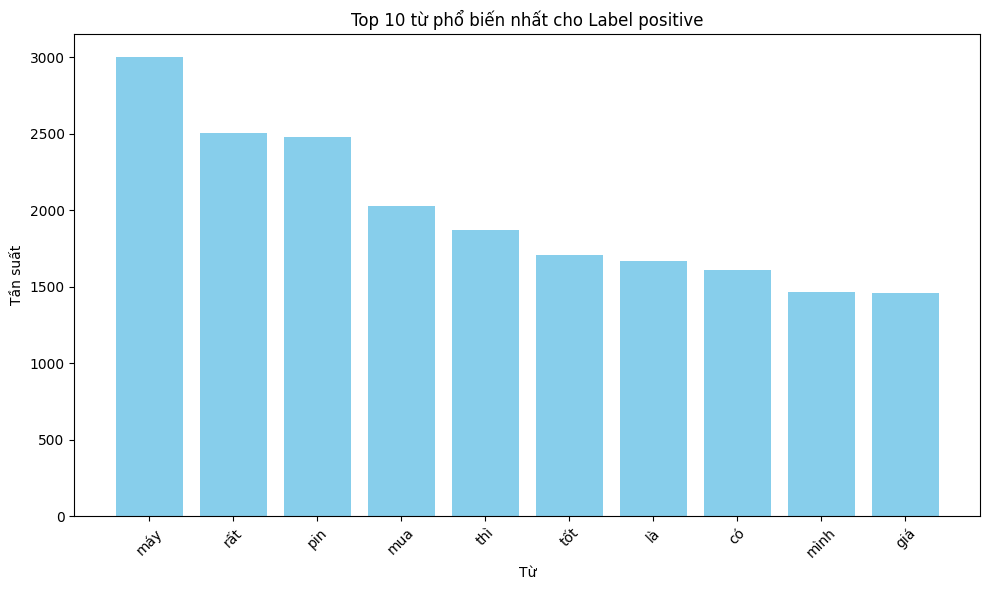

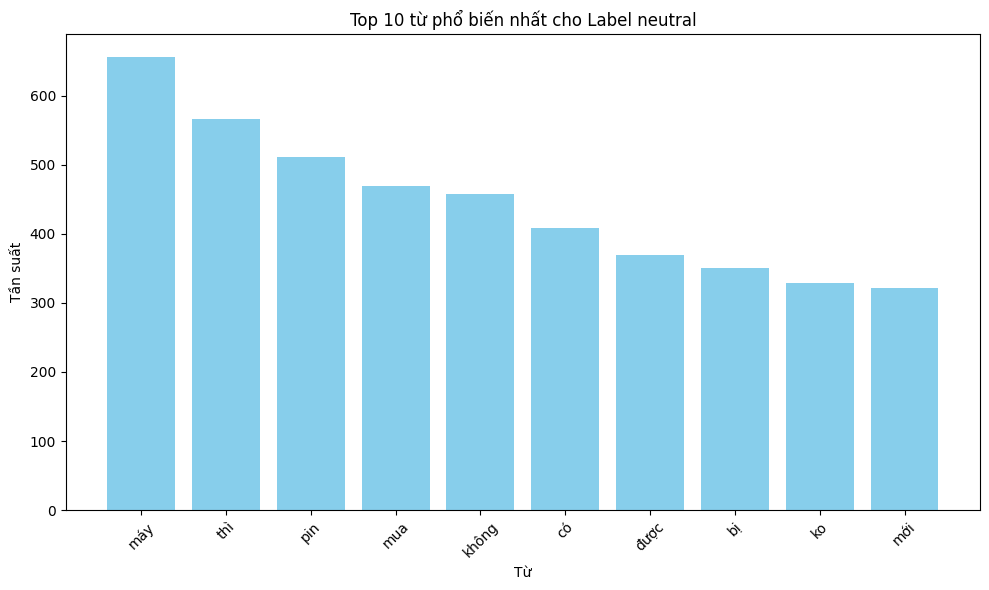

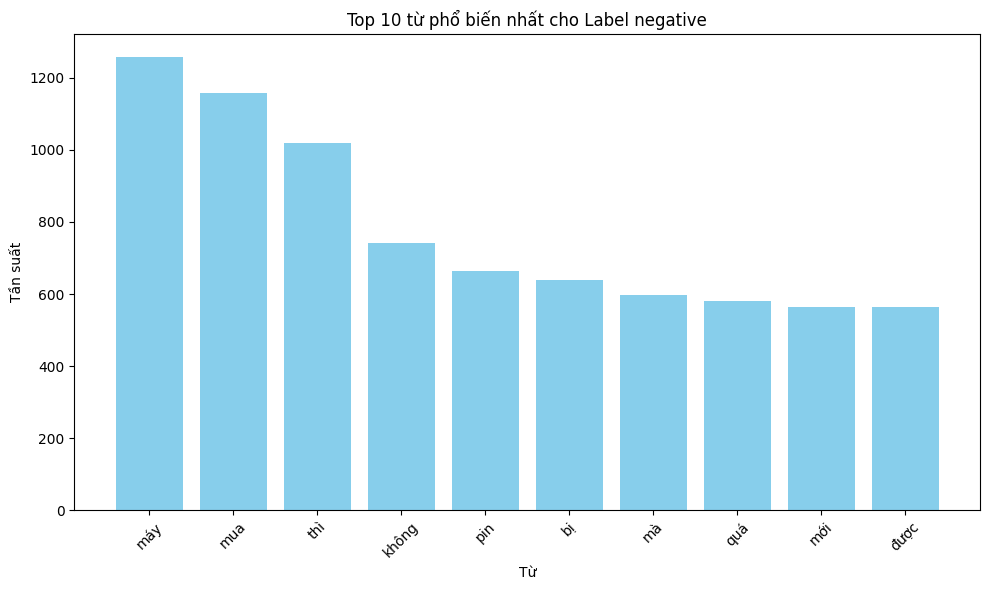

In [ ]:
# Khởi tạo từ điển để lưu số lần xuất hiện của từ theo nhãn
word_counts_by_label = {}

# Duyệt qua từng nhãn và đếm từ
for label in df['label'].unique():
    # Lấy tất cả các từ của nhãn hiện tại
    words = df[df['label'] == label]['processed_text'].sum()
    print(len(words))

    # Đếm tần suất từ
    word_counts = Counter(words)

    # Lấy 100 từ xuất hiện nhiều nhất
    most_common_words = word_counts.most_common(100)

    # Lưu kết quả vào từ điển
    word_counts_by_label[label] = most_common_words

# Biểu diễn kết quả bằng biểu đồ cột
for label, words in word_counts_by_label.items():
    # Lấy từ và tần suất
    words_list, counts = zip(*words)

    # Tạo biểu đồ cột
    plt.figure(figsize=(10, 6))
    plt.bar(words_list[:10], counts[:10], color='skyblue')  # Hiển thị top 10 từ phổ biến nhất
    plt.title(f'Top 10 từ phổ biến nhất cho Label {label}')
    plt.xlabel('Từ')
    plt.ylabel('Tần suất')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

51503
17453
28441

Top 10 2-grams phổ biến nhất cho Label positive:
       2-gram  Tần suất
0   chơi game       961
1    pin trâu       736
2   nhân viên       719
3    sản phẩm       701
4     tầm giá       662
5    màn hình       610
6  nhiệt tình       607
7     mới mua       535
8     sử dụng       531
9   nói chung       520

Top 10 2-grams phổ biến nhất cho Label neutral:
       2-gram  Tần suất
0    màn hình       176
1     mới mua       163
2   chơi game       162
3     vân tay       109
4     sử dụng        91
5     mọi thứ        81
6  điện thoại        74
7   thất vọng        73
8     cảm ứng        68
9    ứng dụng        64

Top 10 2-grams phổ biến nhất cho Label negative:
       2-gram  Tần suất
0    màn hình       289
1     mới mua       273
2   thất vọng       242
3   chơi game       225
4     cảm ứng       162
5      quá tệ       159
6    sản phẩm       159
7     vân tay       156
8  điện thoại       151
9     mua máy       127


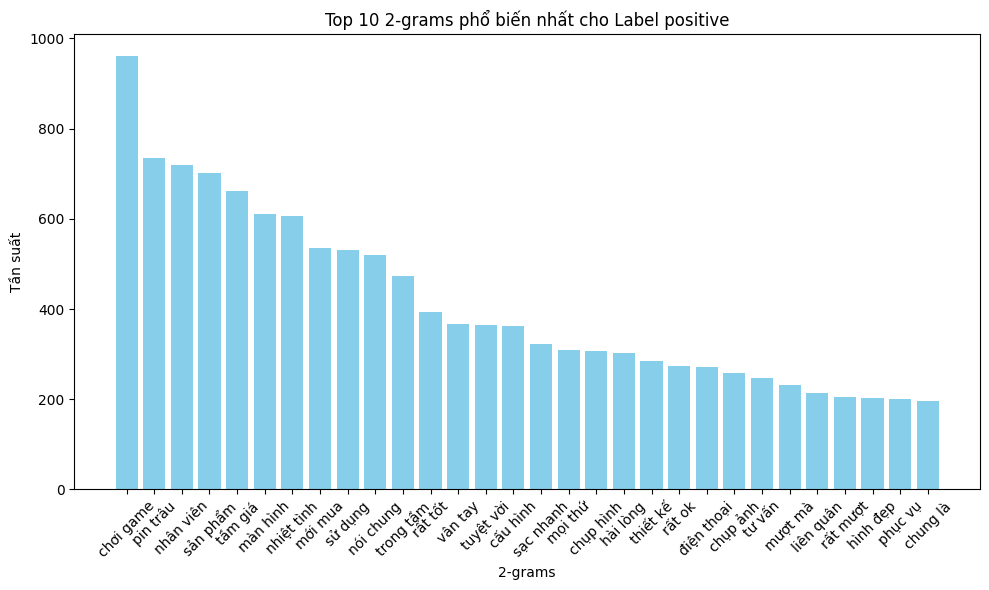

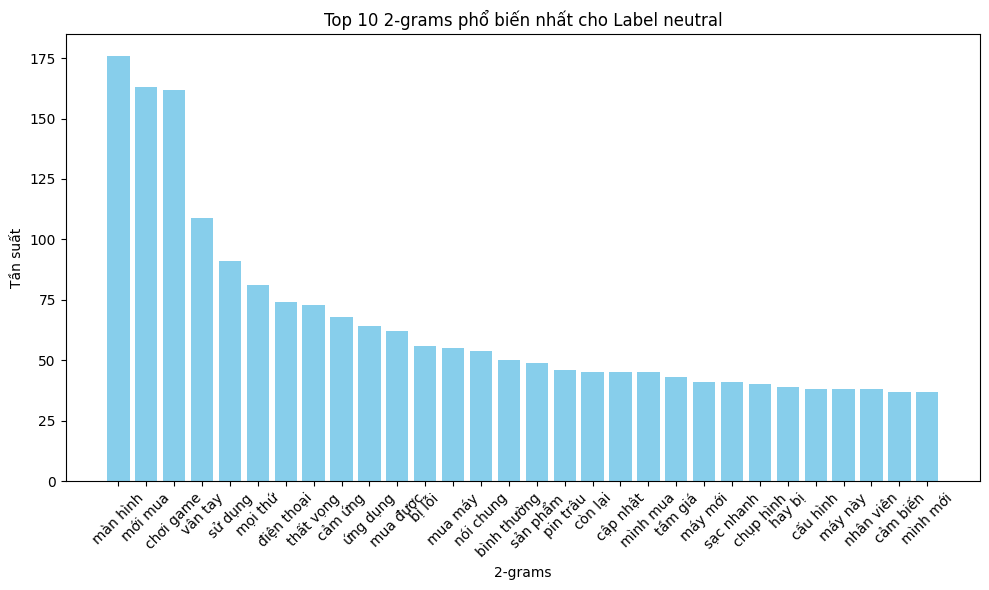

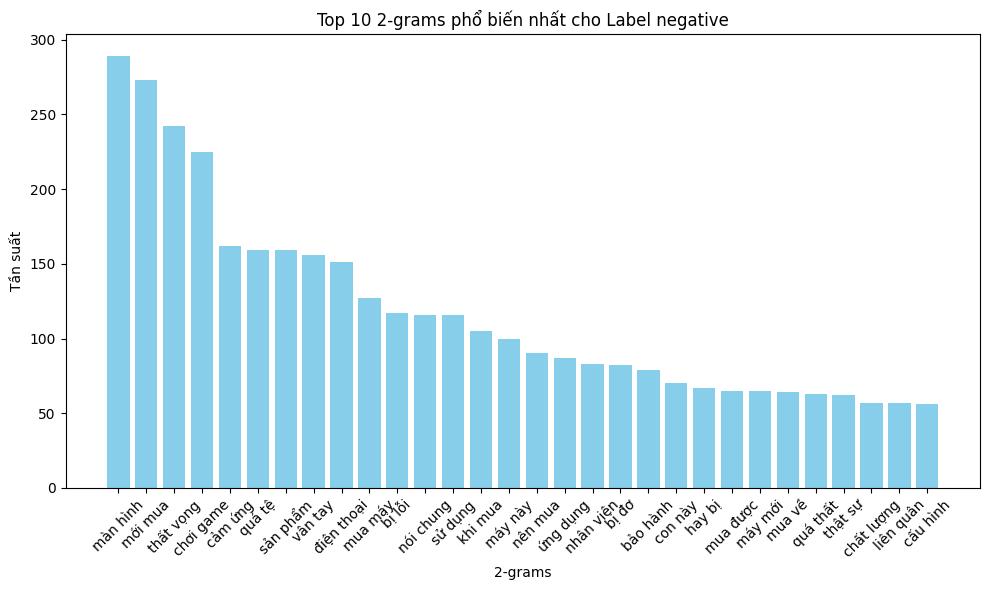

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Tạo vectorizer để sinh 2-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
# Khởi tạo từ điển để lưu số lần xuất hiện của 2-grams theo nhãn
bigram_counts_by_label = {}

# Duyệt qua từng nhãn và đếm 2-grams
for label in df['label'].unique():
    # Lấy tất cả văn bản thuộc nhãn hiện tại
    texts = df[df['label'] == label]['comment']

    # Tạo ma trận đặc trưng cho 2-grams
    X = vectorizer.fit_transform(texts)

    # Lấy danh sách 2-grams và tần suất tương ứng
    bigrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    print(len(counts))

    # Tạo danh sách các 2-grams và tần suất, sắp xếp giảm dần
    bigram_counts = sorted(zip(bigrams, counts), key=lambda x: x[1], reverse=True)

    # Lấy 100 2-grams xuất hiện nhiều nhất
    most_common_bigrams = bigram_counts[:1000]


    # Lưu kết quả vào từ điển
    bigram_counts_by_label[label] = most_common_bigrams


# Tạo bảng phân phối cho từng nhãn
for label, bigrams in bigram_counts_by_label.items():
    print(f"\nTop 10 2-grams phổ biến nhất cho Label {label}:")
    print(pd.DataFrame(bigrams[:10], columns=['2-gram', 'Tần suất']))

# Biểu diễn kết quả bằng biểu đồ cột
for label, bigrams in bigram_counts_by_label.items():
    # Lấy 2-grams và tần suất
    bigram_list, counts = zip(*bigrams[:30])

    # Tạo biểu đồ cột
    plt.figure(figsize=(10, 6))
    plt.bar(bigram_list, counts, color='skyblue')  # Hiển thị top 10 2-grams phổ biến nhất
    plt.title(f'Top 10 2-grams phổ biến nhất cho Label {label}')
    plt.xlabel('2-grams')
    plt.ylabel('Tần suất')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
df['comment'] = df['processed_text'].apply(lambda x: ' '.join(x))
df['comment']

,comment
0,mới mua máy này tại thegioididong thốt nốt cảm...
1,pin kém còn lại miễn chê mua tình trạng pin cò...
2,sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...
3,mọi người cập nhật phần mềm lại nó sẽ bớt tốn ...
4,mới mua sài được tháng thấy pin rất trâu sài b...
...,...
7002,sau gần tháng sử dụng thấy mọi thứ đều ổn pin ...
7003,mình mua máy được ngày mình k thích ss nhưng t...
7004,vô đối trong phân khúc chơi game cực mượt pin ...
7005,tôi đã mua và dùng thử rất tuyệt chơi game thì...


In [ ]:

# Tách dữ liệu
X = df['comment']
y = df['label']


# Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize dữ liệu bằng Tfidf
tfidf = TfidfVectorizer(max_features=5000)  # Giới hạn số lượng từ đặc trưng
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()


In [ ]:


# Huấn luyện Logistic Regression cho dữ liệu TF-IDF
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Dự đoán và đánh giá
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.23      0.03      0.05       323
     neutral       0.25      0.01      0.01       186
    positive       0.64      0.97      0.77       893

    accuracy                           0.62      1402
   macro avg       0.37      0.33      0.28      1402
weighted avg       0.49      0.62      0.50      1402



In [ ]:

# Huấn luyện Random Forest cho dữ liệu TF-IDF
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

# Dự đoán và đánh giá
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

    negative       0.25      0.01      0.01       323
     neutral       0.00      0.00      0.00       186
    positive       0.64      0.99      0.77       893

    accuracy                           0.63      1402
   macro avg       0.30      0.33      0.26      1402
weighted avg       0.46      0.63      0.50      1402



In [ ]:
from sklearn.svm import SVC

# Huấn luyện SVM cho dữ liệu TF-IDF
svm = SVC()
svm.fit(X_train_tfidf, y_train)

# Dự đoán và đánh giá
y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))


SVM Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       323
     neutral       0.00      0.00      0.00       186
    positive       0.64      1.00      0.78       893

    accuracy                           0.64      1402
   macro avg       0.21      0.33      0.26      1402
weighted avg       0.41      0.64      0.50      1402



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.2, random_state=42)

# Vectorize dữ liệu bằng CountVectorizer với bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# Huấn luyện Logistic Regression cho dữ liệu bi-grams
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.64      0.61      0.63       323
     neutral       0.26      0.14      0.18       186
    positive       0.81      0.90      0.85       893

    accuracy                           0.73      1402
   macro avg       0.57      0.55      0.55      1402
weighted avg       0.70      0.73      0.71      1402



In [ ]:
# Huấn luyện Random Forest cho dữ liệu bi-grams
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

    negative       0.59      0.56      0.58       323
     neutral       0.12      0.01      0.01       186
    positive       0.76      0.93      0.84       893

    accuracy                           0.72      1402
   macro avg       0.49      0.50      0.47      1402
weighted avg       0.64      0.72      0.67      1402



In [ ]:
# Huấn luyện SVM cho dữ liệu bi-grams
svm = SVC()
svm.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_svm = svm.predict(X_test)
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

    negative       0.66      0.46      0.54       323
     neutral       0.00      0.00      0.00       186
    positive       0.74      0.97      0.84       893

    accuracy                           0.73      1402
   macro avg       0.47      0.48      0.46      1402
weighted avg       0.62      0.73      0.66      1402



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import tensorflow
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_val, y_train, y_val = train_test_split(df['comment'], df['label'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Padding
max_length = max(len(x) for x in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')

# Mã hóa nhãn
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# One-hot encode 
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)

# Xây dựng mô hình biLSTM
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
model.add(Conv1D(128, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform"))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))  # 3 lớp đầu ra

# Biên dịch mô hình
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# Huấn luyện mô hình và đánh giá
model.fit(
    X_train_pad, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(X_val_pad, y_val)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6750 - loss: 0.8206 - val_accuracy: 0.7539 - val_loss: 0.5840
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8032 - loss: 0.4969 - val_accuracy: 0.7675 - val_loss: 0.5732
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8417 - loss: 0.3985 - val_accuracy: 0.7646 - val_loss: 0.6159
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8791 - loss: 0.3130 - val_accuracy: 0.7660 - val_loss: 0.6867
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9037 - loss: 0.2546 - val_accuracy: 0.7347 - val_loss: 0.8118
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9293 - loss: 0.1915 - val_accuracy: 0.7432 - val_loss: 0.8723
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9552 - loss: 0.1314 - val_accuracy: 0.7432 - val_loss: 1.0663
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9573 - loss: 0.1197 - val_accuracy: 0.7290 - v